In [1]:
import sys
sys.path.insert(0, "../../PopV")
import anndata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import popv
import importlib

From /home/cane/miniconda3/lib/python3.8/site-packages/tensorflow/python/compat/v2_compat.py:107: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term
Created a temporary directory at /tmp/tmpm1jr7of_
Writing /tmp/tmpm1jr7of_/_remote_module_non_scriptable.py
Global seed set to 0


In [2]:
DPI = 600

In [3]:
popv.__file__

'/data/extra_files/galen_dropbox_figures/can_reproducibility/lung_models/figure_2/../../PopV/popv/__init__.py'

In [6]:
ls ../lung_annotation/annotation

confusion_matrices.pdf
confusion_matrices_popv_prediction.pdf
popv_output/
popv_results/
pretrained_models/
query_and_reference_final.h5ad
query_and_reference_popv_coarse_ontology_accuracy.h5ad
query_and_reference_popv_fine_ontology_accuracy.h5ad
query_and_reference_popv.h5ad
TS_Lung.h5ad


In [8]:
adata = anndata.read('../lung_annotation/annotation/query_and_reference_popv.h5ad')
adata = adata[adata.obs['_dataset']=='query']

In [9]:
adata

View of AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probab

In [10]:
adata

View of AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probab

In [11]:
adata.obs['paper_annotation']

P1_4_TTGGAACTCCGTAGTA                       Macrophage
P1_4_TTGGCAAAGAGGACGG                       Macrophage
P1_4_TTCTTAGAGGATGGTC                       Macrophage
P1_4_TTGGAACAGGGATCTG                       Macrophage
P1_4_TTGCGTCTCAGATAAG                       Macrophage
                                       ...            
K23_B003269.gencode.vH29                Natural Killer
K21_B003269.gencode.vH29                Natural Killer
B4_B002460.gencode.vH29     Alveolar Epithelial Type 2
K19_B003269.gencode.vH29                Natural Killer
G3_B003269.gencode.vH29          Differentiating Basal
Name: paper_annotation, Length: 69650, dtype: category
Categories (59, object): ['Adventitial Fibroblast', 'Airway Smooth Muscle', 'Alveolar Epithelial Type 1', 'Alveolar Epithelial Type 2', ..., 'Signaling Alveolar Epithelial Type 2', 'TREM2+ Dendritic', 'Vascular Smooth Muscle', 'Vein']

In [12]:
from popv.reproducibility import _alluvial

In [13]:
adata.obs["paper_annotation"] = adata.obs["paper_annotation"].astype(str) + ' '

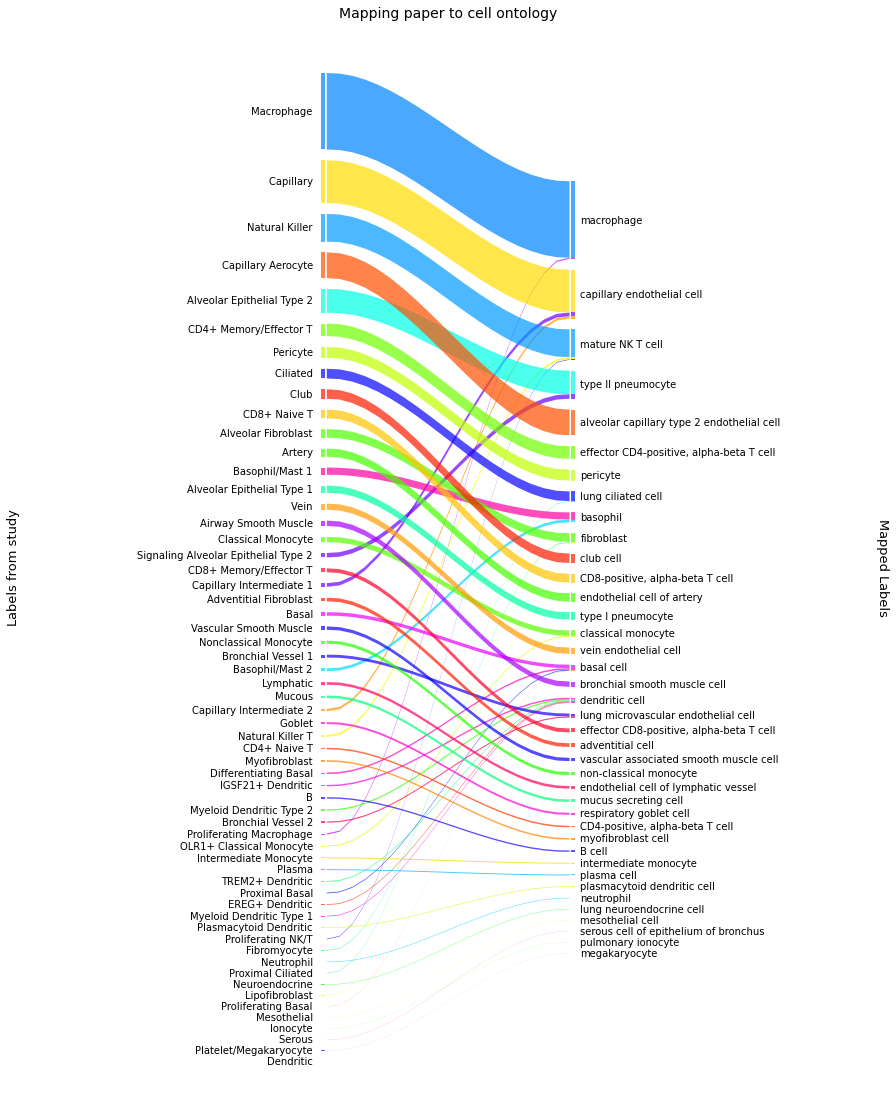

In [14]:
input_data = adata.obs[["paper_annotation", "cell_ontology_class"]].values.tolist()

ax = _alluvial.plot(
    input_data,
    alpha=0.7,
    color_side=0,
    rand_seed=1,
    figsize=(5, 20),
    fontname="Dejavu Sans",
    labels=("Labels from study", "Mapped Labels"),
    label_shift=1,
    v_gap_frac=0.03
)
ax.set_title('Mapping paper to cell ontology', fontsize=14, fontname='Dejavu Sans')
fig = plt.gcf()
fig.savefig("fig2/fig2_alluvial_study_to_ont_labels.pdf", dpi=DPI, bbox_inches="tight")
plt.show()

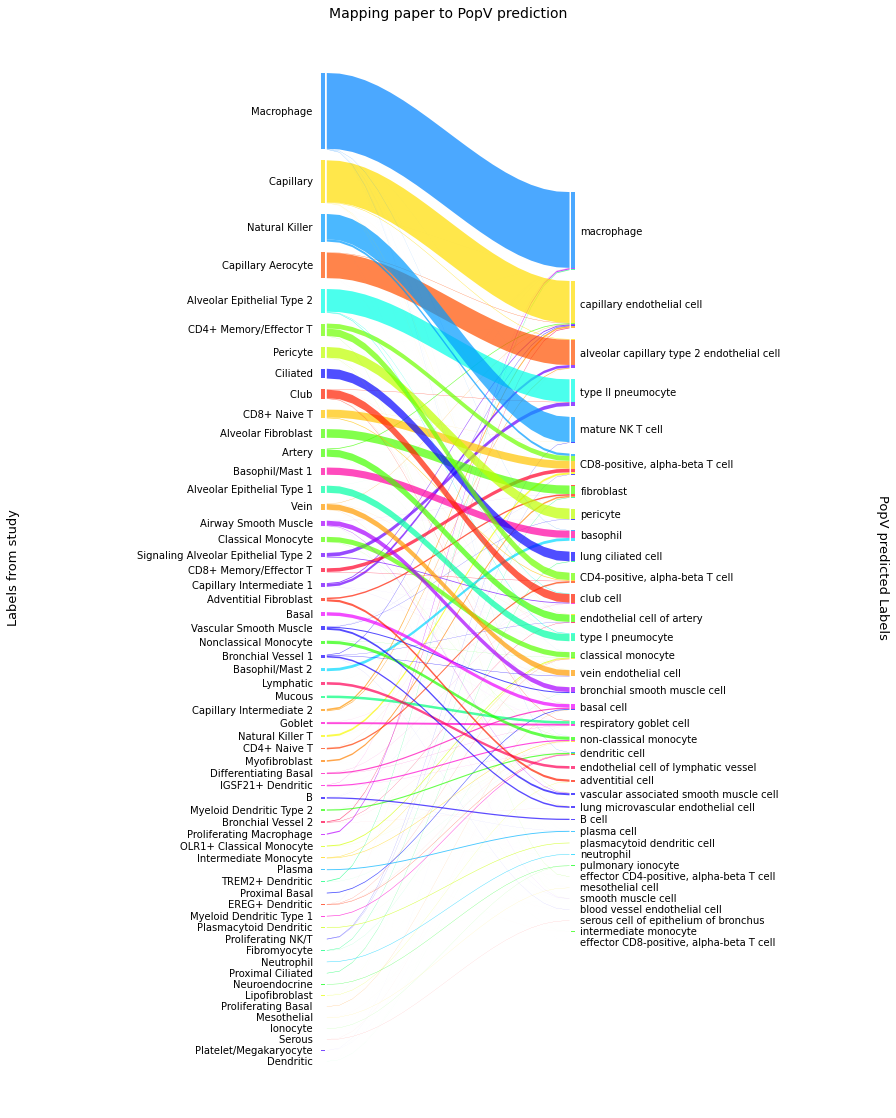

In [15]:
input_data = adata.obs[["paper_annotation", "popv_prediction"]].values.tolist()

ax = _alluvial.plot(
    input_data,
    alpha=0.7,
    color_side=0,
    rand_seed=1,
    figsize=(5, 20),
    fontname="Dejavu Sans",
    labels=("Labels from study", "PopV predicted Labels"),
    label_shift=1,
    v_gap_frac=0.03
)
ax.set_title('Mapping paper to PopV prediction', fontsize=14, fontname='Dejavu Sans')
fig = plt.gcf()
fig.savefig("fig2/fig2_alluvial_study_to_popv_prediction.pdf", dpi=DPI, bbox_inches="tight")
plt.show()

In [16]:
mismatch_ontology = adata[adata.obs['popv_majority_vote_prediction'] != adata.obs['popv_prediction']].copy()

In [21]:
mismatch_ontology.obs["cell_ontology_class"] = mismatch_ontology.obs["cell_ontology_class"].astype(str) + ' '

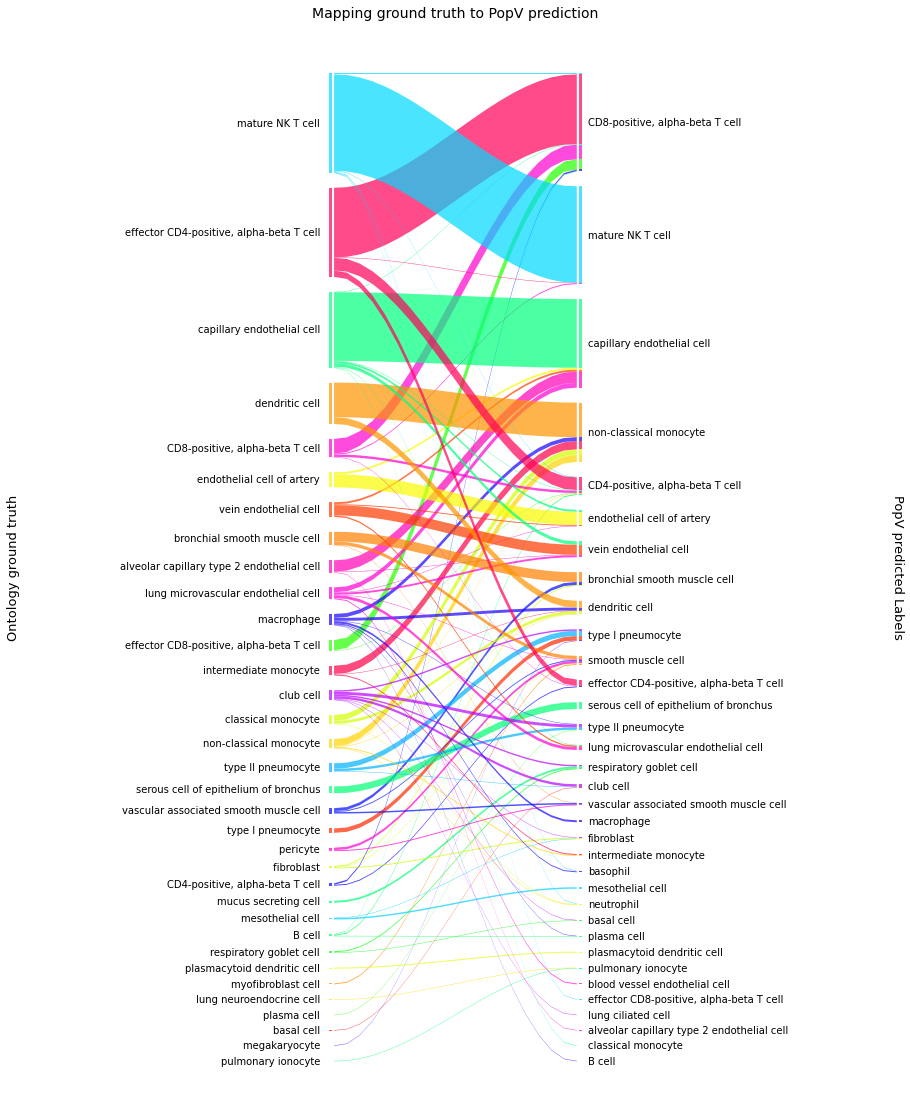

In [22]:
input_data = mismatch_ontology.obs[["cell_ontology_class", "popv_prediction"]].values.tolist()

ax = _alluvial.plot(
    input_data,
    alpha=0.7,
    color_side=0,
    rand_seed=1,
    figsize=(5, 20),
    fontname="Dejavu Sans",
    labels=("Ontology ground truth", "PopV predicted Labels"),
    label_shift=1,
    v_gap_frac=0.03
)
ax.set_title('Mapping ground truth to PopV prediction', fontsize=14, fontname='Dejavu Sans')
fig = plt.gcf()
fig.savefig("fig2/fig2_mismatch_majority_vote_popv.pdf", dpi=DPI, bbox_inches="tight")
plt.show()

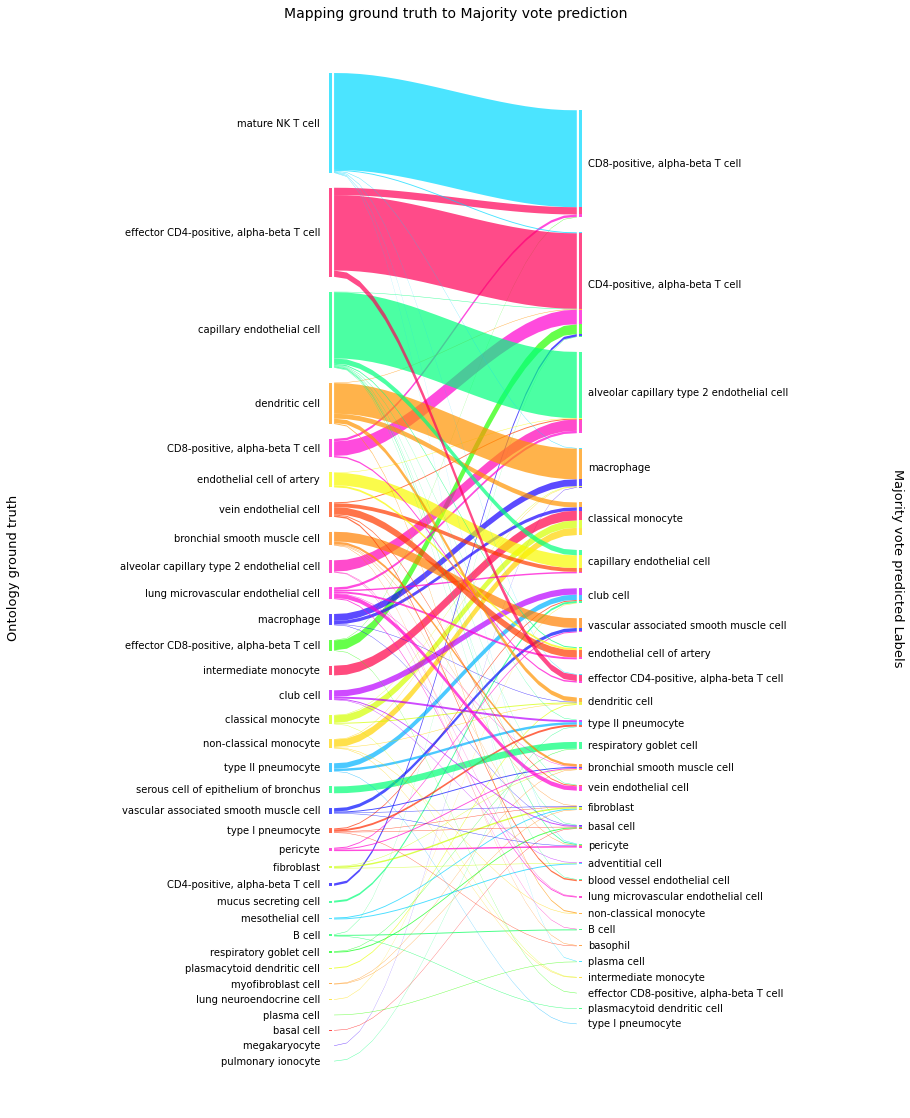

In [23]:
input_data = mismatch_ontology.obs[["cell_ontology_class", "popv_majority_vote_prediction"]].values.tolist()

ax = _alluvial.plot(
    input_data,
    alpha=0.7,
    color_side=0,
    rand_seed=1,
    figsize=(5, 20),
    fontname="Dejavu Sans",
    labels=("Ontology ground truth", "Majority vote predicted Labels"),
    label_shift=1,
    v_gap_frac=0.03
)
ax.set_title('Mapping ground truth to Majority vote prediction', fontsize=14, fontname='Dejavu Sans')
fig = plt.gcf()
fig.savefig("fig2/fig2_mismatch_majority_vote_majority.pdf", dpi=DPI, bbox_inches="tight")
plt.show()

In [24]:
from sklearn.metrics import f1_score,classification_report

In [26]:
mismatch_ontology = adata[adata.obs['popv_majority_vote_prediction'] != adata.obs['popv_prediction']].copy()

pred_keys = ['popv_majority_vote_prediction', 'popv_prediction']

In [28]:
y_true = mismatch_ontology.obs['cell_ontology_class']
f1_df = pd.DataFrame(columns = ['macro', "micro", "weighted"])

for key in pred_keys:
    y_pred = list(mismatch_ontology.obs[key])
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    f1_df.loc[key] = [f1_macro, f1_micro,f1_weighted]

In [29]:
f1_df

,macro,micro,weighted
popv_majority_vote_prediction,0.155301,0.143137,0.123249
popv_prediction,0.298588,0.526471,0.509635


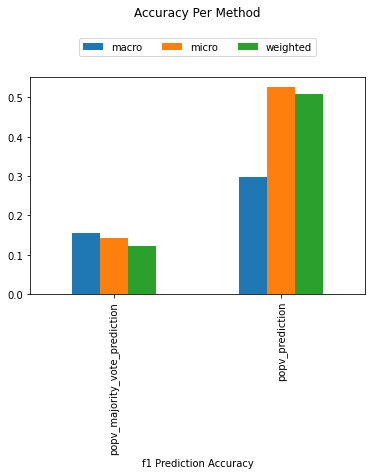

In [38]:
ax = f1_df.plot.bar()

ax.set_xlabel('f1 Prediction Accuracy')
ax.set_title('Accuracy Per Method', y=1.25)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=3)
fig = plt.gcf()
fig.savefig("fig2/fig2_mismatch_majority_vote_f1_scores.pdf", dpi=DPI, bbox_inches="tight")
plt.show()